# 1.1
Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы

In [4]:
from math import sin, asin
from math import cos, acos
from math import tan, atan
from math import degrees, radians
from math import pi

class Trigonometry:
    
    @staticmethod
    def to_radians(degrees):
        '''перевод в радианы'''
        return radians(degrees)
    
    @staticmethod
    def cos(x_deg=None, x_rad=None):
        '''cos'''
        if x_rad is not None:
            return cos(x_rad)
        elif x_deg is not None:
            return cos(radians(x_deg))
        else:
            return ValueError("degrees or radiance")

    @staticmethod
    def sin(x_deg=None, x_rad=None):
        '''sin'''
        if x_rad is not None:
            return sin(x_rad)
        elif x_deg is not None:
            return sin(radians(x_deg))
        else:
            return ValueError("degrees or radiance")

    
    @staticmethod
    def tan(x_deg=None, x_rad=None):
        '''tan'''
        if x_rad is not None:
            return tan(x_rad)
        elif x_deg is not None:
            return tan(radians(x_deg))
        else:
            return ValueError("degrees or radiance")
   

    @staticmethod
    def arcsin(value, is_degrees=False):
        '''arc sin'''
        if not -1<=value<=1:
            raise ValueError("")
        res = asin(value)
        return degrees(res) if is_degrees else res


    @staticmethod
    def arccos(value, is_degrees=False):
        '''arc cos'''
        if not -1<=value<=1:
            raise ValueError("")
        res = acos(value)
        return degrees(res) if is_degrees else res
    

    @staticmethod
    def arctan(value, is_degrees=False):
        '''arc tan'''
        res = atan(value)
        return degrees(res) if is_degrees else res
    

if __name__ == "__main__":
    print(round(Trigonometry.sin(x_deg=30),5))
    print(round(Trigonometry.cos(x_rad=pi/3),5))
    print(round(Trigonometry.tan(x_deg=45),5))

    print(round(Trigonometry.arcsin(value=0.5, is_degrees=True),5))
    print(round(Trigonometry.arccos(value=0.5, is_degrees=True),5))
    print(round(Trigonometry.arcsin(value=1, is_degrees=True),5))
    
    print(round(Trigonometry.to_radians(180),5))

0.5
0.5
1.0
30.0
60.0
90.0
3.14159


# 2
Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.
```bash
    a
   /\
  b  c
 / \  \
d   e  f
```

In [ ]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)
        # Если data == self.data, ничего не делаем (нет дубликатов)

    def PrintTree(self):
        """
        Рекурсивная печать всего дерева в порядке: левое поддерево -> корень -> правое поддерево (in-order traversal).
        Это позволяет вывести элементы в отсортированном порядке.
        """
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()

    def print_root_and_children(self):
        """
        Выводит корень дерева, а также его левое и правое поддеревья (если они есть).
        """
        print(f"Корень дерева: {self.data}")
        
        if self.left:
            print("Левое поддерево:")
            self.left.PrintTree()
        else:
            print("Левое поддерево: пусто")
            
        if self.right:
            print("Правое поддерево:")
            self.right.PrintTree()
        else:
            print("Правое поддерево: пусто")


# Пример использования для создания дерева из задания (a -> b, c; b -> d, e; c -> f)
if __name__ == "__main__":
    # Создаем корень
    root = Tree('a')
    root = Tree(10)
    root.insert(5)
    root.insert(15)
    root.insert(3)
    root.insert(7)
    root.insert(12)
    root.insert(18)
    root.insert(41)
    root.insert(2)


    print("Печать корня и его поддеревьев")
    root.print_root_and_children()
    print("\nПечать всего дерева (in-order)")
    root.PrintTree()
    '''
            10
          /    \
         5      15
        / \    /  \
       3   7  12   18
      /              \
     2                41
    '''

Печать корня и его поддеревьев
Корень дерева: 10
Левое поддерево:
2
3
5
7
Правое поддерево:
12
15
18
41

Печать всего дерева (in-order)
2
3
5
7
10
12
15
18
41


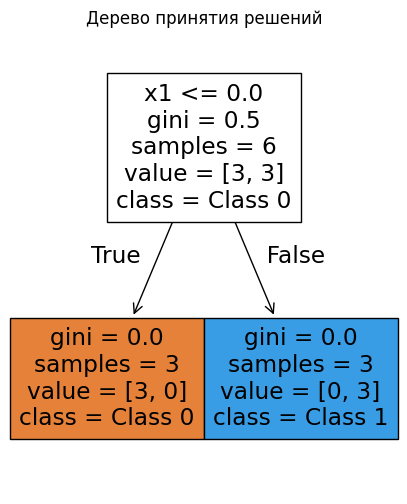

Прогнозы для новых точек:
[0. 0.] → класс 0
[-1.5 -0.5] → класс 0
[2.5 1.5] → класс 1


In [15]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# Создаём и обучаем дерево
clf = sk.tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, target)

# Визуализация дерева (опционально)
plt.figure(figsize=(5, 6))
sk.tree.plot_tree(clf, feature_names=['x1', 'x2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Дерево принятия решений")
plt.show()

# Прогноз для новых точек (для проверки)
new_points = np.array([[0, 0], [-1.5, -0.5], [2.5, 1.5]])
predictions = clf.predict(new_points)
print("Прогнозы для новых точек:")
for point, pred in zip(new_points, predictions):
    print(f"{point} → класс {pred}")

Первые 5 строк:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   

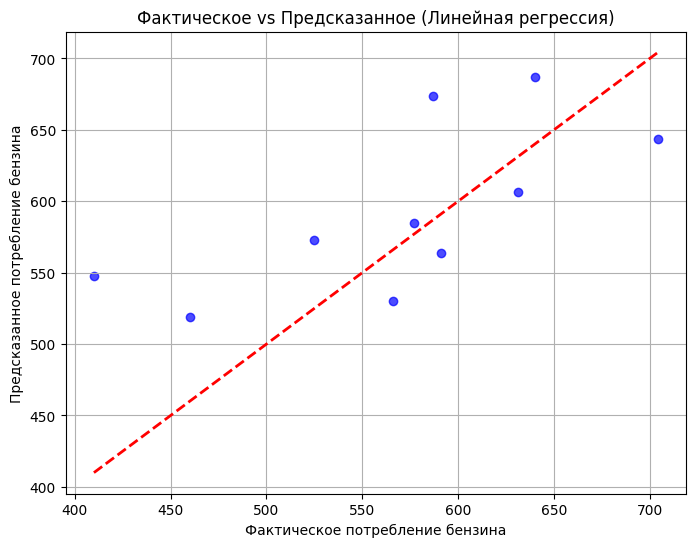


=== Коэффициенты модели ===
Свободный член (intercept): 361.45
Petrol_tax: -36.9937
Average_income: -0.0565
Paved_Highways: -0.0044
Population_Driver_licence(%): 1346.8693


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Загрузка данных
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
df = pd.read_csv(url)

print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print(f"\nРазмер данных: {df.shape}")

# 2. Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())

# 3. Признаки и целевая переменная
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# 5. Обучение модели — начнём с линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Прогноз
y_pred = model.predict(X_test)

# 7. Оценка точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Оценка модели (Linear Regression) ===")
print(f"R² Score       : {r2:.4f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")

# 8. Визуализация: фактическое vs предсказанное
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактическое потребление бензина')
plt.ylabel('Предсказанное потребление бензина')
plt.title('Фактическое vs Предсказанное (Линейная регрессия)')
plt.grid(True)
plt.show()

# 9. Коэффициенты модели (интерпретация)
feature_names = X.columns
coefficients = model.coef_
intercept = model.intercept_

print("\n=== Коэффициенты модели ===")
print(f"Свободный член (intercept): {intercept:.2f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")